In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
boston_df = pd.DataFrame(
  data=data,
  columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
)

boston_df['PRICE']=target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


- CRIM: 도시별 범죄율
- ZN: 25,000 평방 피트를 초과하는 주거용 토지 비율
- INDUS: 도시 내 비소매 업종 비율
- CHAS: 찰스 강에 대한 이진 변수(1: 강 주변, 0: 그렇지 않음)
- NOX: 산화 질소 농도
- RM: 주택당 평균 방 수
- AGE: 1940년 이전에 건설된 소유주택 비율
- DIS: 5개의 보스턴 고용 센터까지의 가중 거리
- RAD: 방사형 도로 접근성 지수
- TAX: 재산세율
- PTRATIO: 학생-교사 비율
- B: 1000(Bk - 0.63)^2, 여기서 Bk는 도시의 흑인 비율
- LSTAT: 저소득층 인구 비율
- MEDV: 주택 가격(중앙값, 단위: $1,000)

## Feature 와 Target 의 상관관계 확인

In [4]:
# 어떤 feature가 target을 예측하는데 있어 결정적인 역할을 하는가? (상관관계)

boston_df.corr()['PRICE'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

In [5]:
np.abs(boston_df.corr()['PRICE']).sort_values() # 절댓값

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

## Feature 간 상관관계
- 너무 많은 상관성을 가진 feature 관계 확인
- 다중공선성 여부 확인 (0.7 이상)

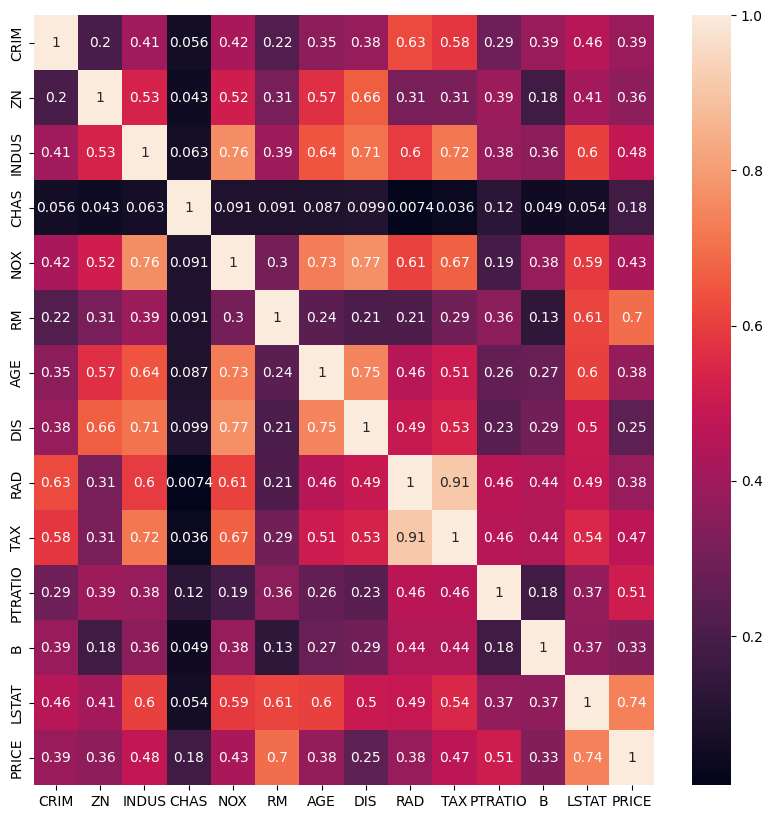

In [6]:
corr_matrix_pos = np.abs(boston_df.corr())

# 시각화-heatmap
plt.figure(figsize=(10,10))

sns.heatmap(
  data=corr_matrix_pos,
  annot=True
)

plt.show()

### 데이터 분할

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
  boston_df.drop('PRICE', axis=1),
  boston_df['PRICE'],
  test_size=0.2,
  random_state=42
)

### 모델 훈련

In [9]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

### 예측

In [10]:
y_pred = lr_reg.predict(X_test)
y_pred[:3]

array([28.99672362, 36.02556534, 14.81694405])

### 평가

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE : {:.3f}'.format(mse))
print('RMSE : {:.3f}'.format(rmse))

print()
print('R2 : {:.3f}'.format(r2))
print('Score : {:.3f}'.format(lr_reg.score(X_test, y_test)))

MSE : 24.291
RMSE : 4.929

R2 : 0.669
Score : 0.669


#### 해석
- 회귀에서 R2, score 값이 0.7이상이면 성공
- 보통 0.5 ~ 0.7 사이
- 오히려 0.8, 0.9 넘어가면 의심
- 시계열 예측에서는 R2=0.4가 적정

### 교차검증

In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
  LinearRegression(),
  X_train, y_train,
  cv=5,
  scoring='neg_mean_squared_error'
)

mse_scores = -1 * scores # 음수를 양수로 바꾸기
rmse_scores = np.sqrt(mse_scores) # RMSE
mean_rmse = np.mean(rmse_scores) # RMSE 평균

mean_rmse

4.829493065236916

In [13]:
boston_df.describe()['PRICE']

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

#### 해석
- 평균이 22 중앙값이 22 : 평균과 중앙값이 거의 유사 >> 정규에 가까운 그래프
- 1Q:17 / 3Q:25 - 중앙값 = 대략 3~5
- 오차가 4.82 : 중앙값에서 1Q, 3Q를 넘어갈 수 있음(boxplot의 box 벗어남)
- 애초에 표준편차가 너무 큼 : 데이터 분포가 넓은 유형
- 좋은 모델 아님

## 다항회귀를 활용한 보스턴 주택가격

In [14]:
from sklearn.preprocessing import PolynomialFeatures

sample = np.arange(6).reshape(3,2)
print('1차 다항식 feature : \n{}'.format(sample))

1차 다항식 feature : 
[[0 1]
 [2 3]
 [4 5]]


In [15]:
poly = PolynomialFeatures(degree=2, include_bias=False) # degree 파라미터 : 몇 차식 만들건지 지정
sample_ftr = poly.fit_transform(sample)

sample_ftr

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.]])

In [16]:
boston_poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = boston_poly.fit_transform(X_train)
X_poly_3.shape, X_train.shape

((404, 559), (404, 13))

행 < 열 : 해가 없을 수 있음

In [17]:
lr_reg_poly = LinearRegression().fit(X_poly_3, y_train)

In [18]:
# 평가를 위해 테스트 데이터 세트도 다차식으로 변환
X_test.shape

(102, 13)

In [19]:
# 테스트 데이터 변환시(transform) ⭐️반드시 훈련 데이터의 transformer 사용⭐️
# 새롭게 테스트 데이터를 위한 transformer 만들면 안됨

X_test_poly_3 = boston_poly.transform(X_test)

In [20]:
y_test_pred = lr_reg_poly.predict(X_test_poly_3)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print('Test MSE : {:.3f}'.format(test_mse))
print('Test RMSE : {:.3f}'.format(test_rmse))
print('Test R2 : {:.3f}'.format(test_r2))

Test MSE : 129848.170
Test RMSE : 360.345
Test R2 : -1769.646


#### 해석
- 행의 개수가 열의 개수보다 작아 해를 찾을 수 없음
- 과대적합

In [21]:
y_pred = lr_reg_poly.predict(X_poly_3)

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

print('MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}'.format(mse, rmse, r2))

MSE : 0.000 / RMSE : 0.000 / R2 : 1.000


## 규제 선형회귀

In [22]:
def show_evaluate(y, y_pred, label=None):
  mse = mean_squared_error(y, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y, y_pred)

  print('{} MSE : {:.3f}'.format(label, mse))
  print('{} RMSE : {:.3f}'.format(label, rmse))
  print('{} R2 : {:.3f}'.format(label, r2))

In [23]:
boston_poly = PolynomialFeatures(degree=3, include_bias=False)

X_poly_3 = boston_poly.fit_transform(X_train)
X_poly_3.shape, X_train.shape

((404, 559), (404, 13))

In [24]:
lr = LinearRegression().fit(X_poly_3, y_train)

In [25]:
X_test_poly_3 = boston_poly.transform(X_test)

lr_train_pred = lr.predict(X_poly_3)
lr_test_pred = lr.predict(X_test_poly_3)

show_evaluate(y_train, lr_train_pred, 'Train')
print()
show_evaluate(y_test, lr_test_pred, 'Test')

Train MSE : 0.000
Train RMSE : 0.000
Train R2 : 1.000

Test MSE : 129848.170
Test RMSE : 360.345
Test R2 : -1769.646


위 선형 회귀 결과는 과대적합! 가중치가 너무 큼

### Ridge 회귀

In [26]:
from sklearn.linear_model import Ridge

ridge_a_10 = Ridge(alpha=10)
ridge_a_10.fit(X_poly_3, y_train) # 3차식 보스턴 주택가격 데이터 세트 넣기

Ridge(alpha=10)

In [27]:
ridge_10_train_pred = ridge_a_10.predict(X_poly_3)
ridge_10_test_pred = ridge_a_10.predict(X_test_poly_3)

show_evaluate(y_train, ridge_10_train_pred, 'train')
print()
show_evaluate(y_test, ridge_10_test_pred, 'test')

train MSE : 9.083
train RMSE : 3.014
train R2 : 0.895

test MSE : 164.825
test RMSE : 12.838
test R2 : -1.248


In [28]:
lr.coef_.max(), ridge_a_10.coef_.max() # 가중치 max 값

(79.2521568486667, 0.06704867296879363)

### Lasso

In [29]:
from sklearn.linear_model import Lasso
lasso_alpha_10 = Lasso(alpha=10).fit(X_poly_3, y_train)

In [30]:
lasso_10_train_pred = lasso_alpha_10.predict(X_poly_3)
lasso_10_test_pred = lasso_alpha_10.predict(X_test_poly_3)

show_evaluate(y_train, lasso_10_train_pred, 'train')
print()
show_evaluate(y_test, lasso_10_test_pred, 'test')

train MSE : 4.366
train RMSE : 2.089
train R2 : 0.950

test MSE : 13.241
test RMSE : 3.639
test R2 : 0.819


lasso가 성능 더 좋아짐 - degree=3 에서 쓸데없는 feature 가 많았다는 뜻

In [31]:
lasso_alpha_10.coef_.max()

0.0033840619872613368

## Ridge와 Lasso의 회귀계수

### Ridge

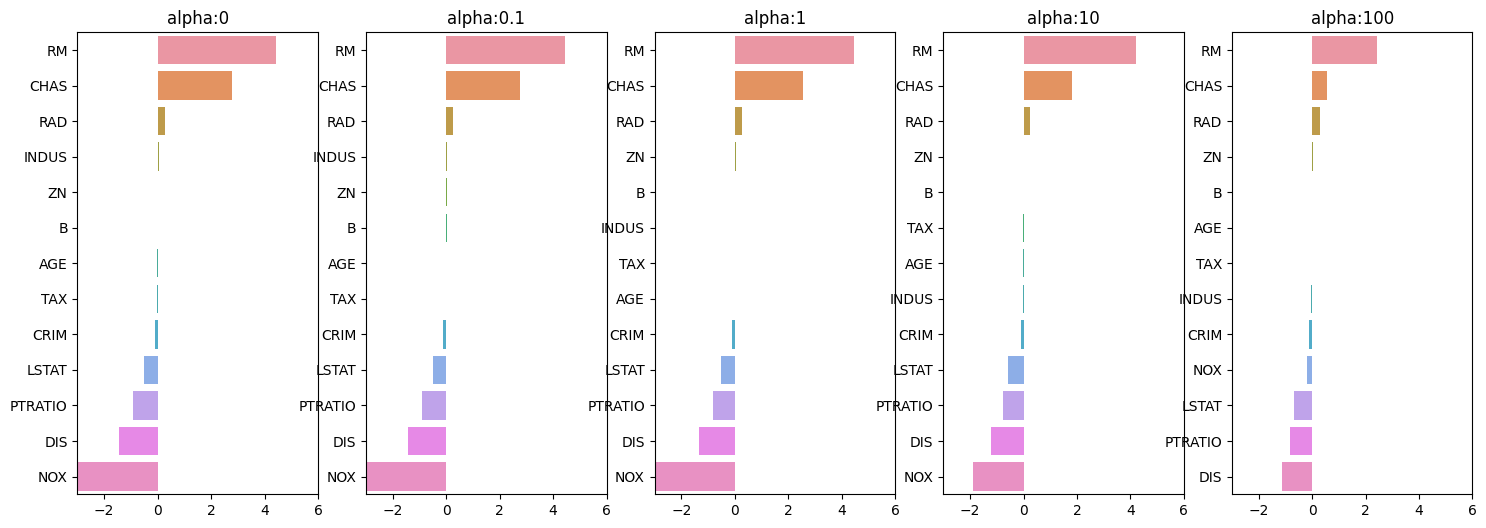

In [32]:
alphas = [0 , 0.1 , 1 , 10 , 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 matplotlib 축 생성
fig , axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 DataFrame의 컬럼으로 추가
  coeff = pd.Series(data=ridge.coef_, index=X_train.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname] = coeff
  # 막대 그래프로 각 alpha 값에서의 회귀계수를 시각화. 회귀 계수값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for문 바깥에서 matplotlib의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()  

### Lasso

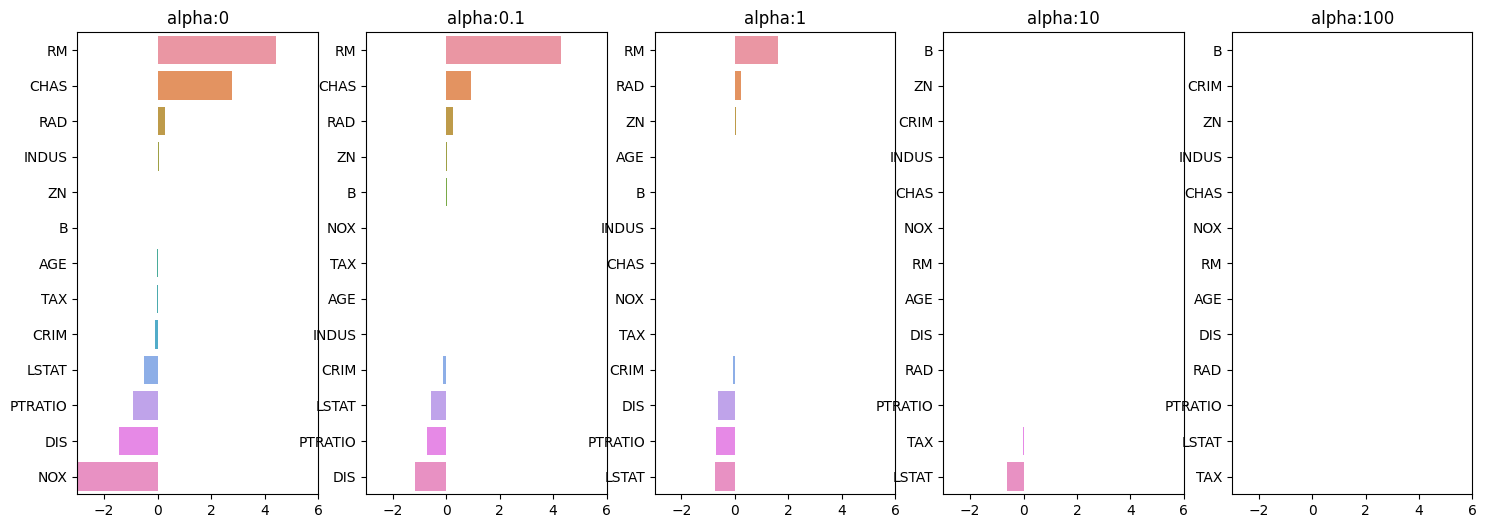

In [33]:
alphas = [0 , 0.1 , 1 , 10 , 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 matplotlib 축 생성
fig , axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 DataFrame의 컬럼으로 추가
  coeff = pd.Series(data=lasso.coef_, index=X_train.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname] = coeff
  # 막대 그래프로 각 alpha 값에서의 회귀계수를 시각화. 회귀 계수값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for문 바깥에서 matplotlib의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()  